### Group Members:

- Name, matriculation number
- Name, matriculation number
- Yiru Yang, 19-737-709

# Assignment 1: Universal Function Approximator


The goal of this exercise is to compare three different neural network architectures and analyze their capacity for function approximation:

1. $N_1$: One-layer network (linear transformation only)
2. $N_2$: One-layer network with non-linear activation function
3. $N_3$: Two-layer network (hidden layer with non-linear activation function)

They will be trained via gradient descent (with weight decay). To show the flexibility of the approach, three different functions will be approximated:
1. $X_1: t = \cos(3x)$ for $x\in[-2,2]$
2. $X_2: t = e^{-x^2}$ for $x\in[-1,1]$
3. $X_3: t = x^5 + 3x^4 - 6x^3 -12x^2 + 5x + 129$ for $x\in[-4,2.5]$

In the theoretical section, the networks will be designed, and the necessary derivatives will be computed by hand.

In the coding section, we will: 

- implement the networks and their gradients,
- generate target data for three different functions, 
- apply the training procedure to the data, and 
- plot the resulting approximated function together with the data samples.

## Section 1: Theoretical Questions

### Network Design

#### Task 1.1: Network Structure

Given input $\vec x = (1, x)^T$, define three neural networks ($N_1$, $N_2$, $N_3$) mathematically, to reach output $y$. Use $g()$ to represent the activation function.

Explain how their structures differ and analyze their function approximation capabilities.

--- 
Note:

For one-layer networks, define parameter $\Theta=\vec w \in\mathbb R^{D+1}$

For two-layer network, define parameters $\Theta=(\mathbf W^{(1)},\vec w^{(2)})$ that are split into $\mathbf W^{(1)}\in\mathbb R^{K\times {(D+1)}}$ for the first layer and $\vec w^{(2)}\in\mathbb R^{K+1}$ for the second layer

$$ y = \mathbf{w}^T \mathbf{x} = w_0 + w_1 x $$

$$ y = g(\mathbf{w}^T \mathbf{x}) = g(w_0 + w_1 x) $$

$$ h = g(\mathbf{W}^{(1)} \mathbf{x}) $$

#### Task 1.2: Network Comparison

Can the one-layer network approximate all three functions well? Why or why not?

1. For N1, can only approximate linear functions. Thus, it can't approximate any of the 3 functions.

2. For N2, has limited some nonlinear approximation capability. Thus, may can approximate X1, X2, but can't approxiamte X3.

What advantages does the two-layer network have compared to a one-layer network?

1. It has hidden layer with nonlinear activation functions.

2. Thus, according to the Universal Approximation Theorem, a two-layer network with sufficient hidden neurons can approximate any continuous function, which a one-layer network can't.

3. it suitable for approximating complex functions like X1, X2, X3.

4. Hierarchical feature extraction capability.

How can we determine the appropriate number of hidden neurons?
When looking at the example plots in the OLAT, how many hidden neurons do we need in order to approximate the functions? Is there any difference between the three target functions?

1. It depends on:
1-Complexity of the target function
X1(cos): Medium complexity, requires approximately 8 neurons
X2(exponential): Relatively simple, requires approximately 6 neurons
X3(polynomial): More complex, requires approximately 12 neurons

2-Quantity and quality of training data
3-Expected approximation accuracy

2. [validation loss / cross- validation] We can start with a small number of neurons and increase gradually, using validation loss to determine when the performance plateaus.

3. 
1-X1(cosine function): Being a periodic function, it requires a moderate number of neurons (8) to capture the periodic variations
2-X2(exponential function): With a relatively simple shape, fewer neurons (6) are sufficient
3-X3(5th-degree polynomial): Requires more neurons (12) to capture the complex non-linear relationships


...

#### Task 1.3: Network Performance

If the network struggles to approximate a function well, what are some possible reasons?

How can we improve the network's performance?


##### Reasons
1. Oversimplified Structure: Insufficient layers or neurons to capture complex patterns

2. Inappropriate Activation Function: Chosen function may not suit the target function characteristics

3. Insufficient Training: Improper learning rate, insufficient epochs

4. Improper Regularization: Weight decay parameter set too high or too low

5. Initialization Issues: Poor weight initialization leading to training difficulties or local minima

6. Vanishing/Exploding Gradients: Potential issues in deeper networks

##### Solutions

1. Increase Model Complexity: Add more hidden layers or neurons

2. Experiment with Different Activation Functions: Try ReLU, tanh, sigmoid, etc.

3. Optimize Training Process: Adjust learning rate, use learning rate schedulers, increase training epochs

4. Fine-tune Regularization: Optimize weight decay parameter to balance underfitting and overfitting

5. Improve Initialization Methods: Use Xavier or He initialization

6. Apply Batch Normalization: Help stabilize the training process

7. Use Advanced Optimizers: Such as Adam, RMSProp, etc.

### Derivatives

#### Task 1.4: Activation Function

Given the hyperbolic tangent ($\tanh$) activation function as:

$$\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$

Prove:

$$\frac{\partial}{\partial x} \tanh(x) = 1 - \tanh^2(x)$$

Hint: Apply the derivative rules as defined in the Lecture:
* Quotient rule
* Sum rule
* Exponential rule

Also, avoid factoring out parentheses.

## Prove

### **Task 1.4: Activation Function**
#### **Problem Statement**
Given the hyperbolic tangent activation function:  
$$\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$  
Prove that its derivative is:  
$$\frac{\partial}{\partial x} \tanh(x) = 1 - \tanh^2(x)$$  

#### **Solution**


1. $\frac{\partial}{\partial x} \tanh(x) = \frac{(e^x + e^{-x})(e^x + e^{-x}) - (e^x - e^{-x})(e^x - e^{-x})}{(e^x + e^{-x})^2} = \frac{4e^x e^{-x}}{(e^x + e^{-x})^2} = 1 - \tanh^2(x)$

#### Task 1.5: Weight Decay

Consider a loss function with L2 regularization (weight decay):
$$
L'(\theta) = L(\theta) + \frac{\lambda}{2} \|\theta\|^2
$$

Compute its derivative with respect to $\theta$: $$\frac{\partial}{\partial \theta} L'(\theta)$$


1. $\frac{\partial}{\partial \theta} L'(\theta) = \frac{\partial}{\partial \theta} L(\theta) + \frac{\partial}{\partial \theta} \left( \frac{\lambda}{2} \|\theta\|^2 \right) = \frac{\partial}{\partial \theta} L(\theta) + \frac{\lambda}{2} \cdot 2\theta = \frac{\partial}{\partial \theta} L(\theta) + \lambda \theta$

#### Task 1.6

How large should an appropriate weight decay parameter $\lambda$ as shown in Task 1.5 be? What would happen if $\lambda$ is set too high or too low?

1. An appropriate weight decay parameter $\lambda$ should range from $10^{-5}$ to $10^{-2}$. If $\lambda$ is too high, weights become too small, causing underfitting and reduced expressivity; if $\lambda$ is too low, regularization becomes ineffective, failing to prevent overfitting and potentially capturing noise in the data.

...

## Section 2: Coding

**<font color='red' size='5'>This section has to be submitted by 11:59 p.m. on Wednesday, March 12th, to be graded.</font>**



### Network Implementation
#### Task 2.1

Recall that for one-layer networks, we define parameter $\Theta=\vec w \in\mathbb R^{D+1}$, and for a two-layer network, we define parameters $\Theta=(\mathbf W^{(1)}\in\mathbb R^{K\times {(D+1)}},\vec w^{(2)}\in\mathbb R^{K+1})$.

- D: The dimension of the input. In this assignment, $D = 1$ since there is only one input.
- K: The number of hidden neurons in the first layer of the two-layer network ($N_3$)

Implement a function that returns the network output for a given input $\vec x$, parameter(s) $\Theta$, and model_type ($N_1$, $N_2$, or $N_3$). Remember that the input of the function $\vec x = (1, x)^T$.

---
Note:

1. Use the `numpy` to implement the $\tanh$ function.
2. Use `numpy.concatenate` or `numpy.insert` to prepend $h_0$.
3. Make use of `numpy.dot` to compute matrix-vector and vector-vector products.

In [1]:
!pip install numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 2.5 MB/s eta 0:00:0000:0100:01


In [2]:
import numpy as np

def forward_pass(x, theta, model_type, K=None):
    """
    Computes the forward pass of the neural network.
    :param x: Input data, shape (N, 2) where the first column is 1 (bias term).
    :param theta: Model parameters.
    :param model_type: One of 'N1', 'N2', 'N3'.
    :param K: Number of hidden neurons for N3.
    :return: Network output y.
    """
    if model_type == 'N1':
        return np.dot(x, theta)  # Linear model
    
    elif model_type == 'N2':
        return np.tanh(np.dot(x, theta))  # Single-layer with non-linearity
    
    elif model_type == 'N3':
        W1, w2 = theta  # Unpack parameters
        h = np.tanh(np.dot(x, W1.T))  # Hidden layer activations
        h = np.insert(h, 0, 1, axis=1)  # Add bias term
        return np.dot(h, w2)  # Output layer
    
    else:
        raise ValueError("Invalid model type")

#### Test 1: Sanity Check

We select a specific number of hidden neurons and create the weights accordingly, using all zeros in the first layer and all ones in the second. The test case below ensures that the function from Task 1 actually returns $11$ for those weights.

In [3]:
import numpy as np

# Define test parameters
K = 20
D = 1
Theta_one_layer = [np.ones(D+1), None]
Theta_two_layer = [np.zeros((K, D+1)), np.ones(K+1)]
x = np.random.rand(D+1)

# Sanity check for N1
y1 = forward_pass(x, Theta_one_layer[0], 'N1')
assert abs(np.sum(x) - y1) < 1e-6
print("N1 test passed.")

# Sanity check for N2
y2 = forward_pass(x, Theta_one_layer[0], 'N2')
assert abs(np.tanh(np.sum(x)) - y2) < 1e-6
print("N2 test passed.")

# Sanity check for N3
y3 = forward_pass(x.reshape(1, -1), Theta_two_layer, 'N3', K)
assert abs(1.0 - y3) < 1e-6
print("N3 test passed.")


N1 test passed.
N2 test passed.
N3 test passed.


### Gradient Implementation
#### Task 2.2: Gradient Computation


Implementation of a function that returns the gradient as defined for a given dataset $X=\{(\vec x^{[n]}, t^{[n]})\}$, given weight(s) $\Theta$, model_type ($N_1$, $N_2$, or $N_3$), and $\lambda$ parameter for weight decay.

---
Note:

We should make sure that both parts of the gradient are computed for $N_3$ (since $\Theta=(\mathbf W^{(1)},\vec w^{(2)})$ here).

This is a very slow implementation. We will see how to speed this up in the next lecture.

In [4]:
def compute_gradient(X, t, theta, model_type, lambda_reg, K=None):
    """
    Computes the gradient of the loss function for given dataset and model.
    :param X: Input data, shape (N, 2).
    :param t: Target values, shape (N,).
    :param theta: Model parameters.
    :param model_type: 'N1', 'N2', or 'N3'.
    :param lambda_reg: Regularization parameter.
    :param K: Number of hidden neurons for N3.
    :return: Gradient of the parameters.
    """
    N = X.shape[0]
    
    if model_type == 'N1':
        y = np.dot(X, theta)
        grad = np.dot(X.T, (y - t)) / N + lambda_reg * theta
        return grad
    
    elif model_type == 'N2':
        y = np.tanh(np.dot(X, theta))
        grad = np.dot(X.T, (y - t) * (1 - y**2)) / N + lambda_reg * theta
        return grad
    
    elif model_type == 'N3':
        W1, w2 = theta
        h = np.tanh(np.dot(X, W1.T))
        h_bias = np.insert(h, 0, 1, axis=1)
        y = np.dot(h_bias, w2)
        
        delta2 = (y - t)[:, np.newaxis]
        grad_w2 = np.dot(h_bias.T, delta2) / N + lambda_reg * w2
        
        delta1 = (delta2 @ w2[1:].reshape(1, -1)) * (1 - h**2)
        grad_W1 = np.dot(delta1.T, X) / N + lambda_reg * W1
        
        return (grad_W1, grad_w2)
    
    else:
        raise ValueError("Invalid model type")

#### Task 2.3: Gradient Descent

The procedure of gradient descent is the repeated application of two steps.

1. The gradient of loss $\nabla_{\Theta}\mathcal J^{L_2}$ is computed based on the current value of the parameters $\Theta$.
2. The weights are updated by moving a small step in the direction of the negative gradient:

$$
\begin{align}
    \Theta = \Theta - \eta \nabla_{\Theta}\mathcal J
\end{align}
$$

As a stopping criterion, we select the number of training epochs to be 10000.

Implementation of a function that performs gradient descent for a given dataset $X$, given initial parameters $\Theta$, a given learning rate $\eta$, model_type ($N_1$, $N_2$, or $N_3$), and $\lambda$ parameter for weight decay, and returns the optimized parameters $\Theta^*$.

In [5]:
def gradient_descent(X, t, theta, model_type, lambda_reg, eta, epochs, K=None):
    """
    Performs gradient descent optimization.
    :param X: Input data, shape (N, 2).
    :param t: Target values, shape (N,).
    :param theta: Initial model parameters.
    :param model_type: 'N1', 'N2', or 'N3'.
    :param lambda_reg: Regularization parameter.
    :param eta: Learning rate.
    :param epochs: Number of iterations.
    :param K: Number of hidden neurons for N3.
    :return: Optimized parameters.
    """
    for _ in range(epochs):
        grad = compute_gradient(X, t, theta, model_type, lambda_reg, K)
        
        if model_type == 'N3':
            W1, w2 = theta
            grad_W1, grad_w2 = grad
            W1 -= eta * grad_W1
            w2 -= eta * grad_w2
            theta = (W1, w2)
        else:
            theta -= eta * grad
    
    return theta

### Datasets

#### Task 2.4: Data Samples

In total, we will test our gradient descent function with three different datasets. Particularly, we approximate

1. $X_1: t = \cos(3x)$ for $x\in[-2,2]$
2. $X_2: t = e^{-x^2}$ for $x\in[-1,1]$
3. $X_3: t = x^5 + 3x^4 - 6x^3 -12x^2 + 5x + 129$ for $x\in[-4,2.5]$

Generate dataset $X_1$,  for $N=60$ samples randomly drawn from range $x\in[-2,2]$. Generate data $X_2$ for $N=50$ samples randomly drawn from range $x\in[-1,1]$. Generate dataset $X_3$ for $N=200$ samples randomly drawn from range $x\in[-4,2.5]$. Implement all three datasets as lists of tuples: $\{(\vec x^{[n]}, t^{[n]})\mid 1\leq n\leq N\}$

In [6]:
def generate_data(N: int, function, x_range):
    """
    Generates a dataset as a list of tuples (X, t).

    Parameters:
    - N (int): Number of samples.
    - function (callable): Function to generate target values.
    - x_range (tuple or list): Range (min, max) for x values.

    Returns:
    - list of tuples [(X, t)], where X is a numpy array of shape (2,), 
      including a bias term (1, x), and t is the target output.
    """
    if not isinstance(x_range, (tuple, list)) or len(x_range) != 2:
        raise ValueError("x_range must be a tuple or list with two elements (min, max).")
    
    x = np.random.uniform(x_range[0], x_range[1], N)  # Generate N random x values
    t = function(x)  # Compute target values
    X = np.column_stack((np.ones(N), x))  # Add bias term

    return list(zip(X, t))  # Return as list of (X, t) tuples

# Generate datasets with specified functions
X1 = generate_data(60, lambda x: np.cos(3*x), (-2, 2))
X2 = generate_data(50, lambda x: np.exp(-x**2), (-1, 1))
X3 = generate_data(200, lambda x: x**5 + 3*x**4 - 6*x**3 - 12*x**2 + 5*x + 129, (-4, 2.5))

# Print dataset summary
def print_dataset_info(name, dataset):
    """Prints summary information for a given dataset."""
    x_values = [x[1] for x, _ in dataset]
    print(f"Dataset {name}:")
    print(f"  Number of samples: {len(dataset)}")
    print(f"  X range: {min(x_values):.3f} to {max(x_values):.3f}")
    print(f"  First 3 samples: {dataset[:3]}\n")

print_dataset_info("X1 (cos(3x))", X1)
print_dataset_info("X2 (exp(-x^2))", X2)
print_dataset_info("X3 (polynomial)", X3)

# Define number of hidden neurons for each dataset
K1, K2, K3 = 10, 5, 20



Dataset X1 (cos(3x)):
  Number of samples: 60
  X range: -1.919 to 1.893
  First 3 samples: [(array([1.        , 1.27768638]), np.float64(-0.770311719957078)), (array([ 1.      , -0.884943]), np.float64(-0.8838513367977251)), (array([ 1.        , -0.06665391]), np.float64(0.9800741802890031))]

Dataset X2 (exp(-x^2)):
  Number of samples: 50
  X range: -0.985 to 0.948
  First 3 samples: [(array([1.        , 0.55742703]), np.float64(0.7329154773019153)), (array([ 1.        , -0.83617971]), np.float64(0.4969844635140428)), (array([ 1.        , -0.37848615]), np.float64(0.8665358765724255))]

Dataset X3 (polynomial):
  Number of samples: 200
  X range: -3.986 to 2.494
  First 3 samples: [(array([1.        , 0.28733105]), np.float64(129.3260213452154)), (array([1.        , 0.14200959]), np.float64(129.4521418996488)), (array([1.        , 1.01677876]), np.float64(119.66393805712902))]



#### Test 2: Sanity Check

The test case below ensures that the elements of each generated dataset are tuples with two dimensions.

In [7]:
import numpy as np

# Test to ensure that each dataset element is structured correctly
assert all(
    isinstance(x, (tuple, list)) and
    len(x) == 2 and
    isinstance(x[0], (tuple, list, np.ndarray)) and
    len(x[0]) == 2 and  # Corrected: len(x[0]) == 2 instead of len(x[0] == 2)
    isinstance(x[1], (float, np.float64, np.float32))
    for X in (X1, X2, X3)
    for x in X
)

print('Test passed!')

Test passed!


### Function Approximation
Finally, we want to make use of our gradient descent implementation to approximate our functions. In order to see our success, we want to plot the functions together with the data.

#### Task 2.5: Define hidden Neurons
How many hidden neurons will we need for $N_3$? Use the answers from Task 1.2.

In [8]:
# Define the number of neurons for each target function based on your discussion
# These numbers are examples - adjust based on your analysis in Task 1.2
K1 = 10   # For cos(3x), moderate complexity, oscillatory function
K2 = 5   # For e^(-x²), relatively simple bell-shaped function
K3 = 20  # For the 5th degree polynomial, higher complexity

#### Task 2.6: Random Parameters

For each of the networks, randomly initialize the parameters $\Theta_1,\Theta_2,\Theta_3\in[-1,1]$ for each of the datasets.

For $N_3$, use the number of hidden neurons estimated in Task 1.2 and implemented in Task 2.5.

---
Note:

  1. You can use `numpy.random.uniform` to initialize the weights.
  2. Make sure that the weight matrices are instantiated in the correct dimensions.
  3. Theta should always have two elements. The second element can be `None` for one-layer networks.


In [9]:
import numpy as np

def initialize_parameters(model_type, K, input_dim=2):
    if model_type == 'N1' or model_type == 'N2':
        return np.random.uniform(-1, 1, input_dim)
    elif model_type == 'N3':
        W1 = np.random.uniform(-1, 1, (K, input_dim))
        w2 = np.random.uniform(-1, 1, K+1)
        return (W1, w2)

# Initialize parameters
Theta1 = initialize_parameters('N1', None)
Theta2 = initialize_parameters('N2', None)
Theta3 = initialize_parameters('N3', K1)


#### Task 2.7: Run Gradient Descent

For each network, call gradient descent function from Task 2.3 using the datasets $X_1, X_2, X_3$, the according created parameters $\Theta_1,\Theta_2,\Theta_3$. Store the resulting optimized weights $\Theta_1^*, \Theta_2^*, \Theta_3^*$.

Based on your chosen learning rates $\eta$ and weight decay parameter $\lambda$, you may need to optimize them for these functions. Do you see any differences? What are the best learning rates that you can find?

---
<span style="color:red">WARNING: Depending on the implementation, this might run for several minutes!</span>

---
Note:

1. Start with $\eta=0.1$ and play around with the learning rate improve adaptation.
2. $\eta=0.1$ is too large for $X_3$.

In [10]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 1.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.3/253.3 kB 1.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 858.1 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.4/65.4 kB 1.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 660.2 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 1.4 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [11]:
import numpy as np
import matplotlib.pyplot as plt



# Task 2.7: Run Gradient Descent
eta, lambda_reg, epochs = 0.1, 0.01, 10000
Theta1_opt = gradient_descent(np.array([x for x, _ in X1]), np.array([t for _, t in X1]), Theta1, 'N1', lambda_reg, eta, epochs)
Theta2_opt = gradient_descent(np.array([x for x, _ in X2]), np.array([t for _, t in X2]), Theta2, 'N2', lambda_reg, eta, epochs)
Theta3_opt = gradient_descent(np.array([x for x, _ in X3]), np.array([t for _, t in X3]), Theta3, 'N3', lambda_reg, eta, epochs, K3)


ValueError: non-broadcastable output operand with shape (11,) doesn't match the broadcast shape (11,11)

### Data and Function Plotting

### Task 2.8: Plotting Function

Implement a plotting function that takes a given dataset $X$, given parameters $\Theta$, model_type, and a defined range $R=[\min,\max]$. Each data sample $(x^{[n]},t^{[n]})$ of the dataset is plotted as an $''x''$. In order to plot the function that is approximated by the network, generate sufficient equally-spaced input values $x\in R$, compute the network output $y$ for these inputs, and plot them with a line.

---
Note:

  1. The dataset $X$ is defined as above, a list of tuples $(\vec x, t)$.
  2. Each input in the dataset is defined as $\vec x = (1,x)^T$.
  3. Equidistant points can be obtained via `numpy.arange`.


In [ ]:
def plot_function(X, theta, model_type, R, K=None):
    x_vals = np.linspace(R[0], R[1], 100)
    X_plot = np.column_stack((np.ones(len(x_vals)), x_vals))
    y_vals = forward_pass(X_plot, theta, model_type, K)
    plt.scatter([x[1] for x, _ in X], [t for _, t in X], label="Data")
    plt.plot(x_vals, y_vals, label="Model Approximation", color='red')
    plt.legend()
    plt.show()

#### Task 2.9: Plot Three Functions

For each of the datasets and their optimized parameters, call the plotting function from Task 2.8. Use range $R=[-3,3]$ for dataset $X_1$, range $R=[-2,2]$ for $X_2$, and range $R=[-5,4]$ for dataset $X_3$.

Note that the first element of range $R$ should be the lowest $x$-location, and the second element of $R$ is the highest value for $x$.

Repeat for three networks.

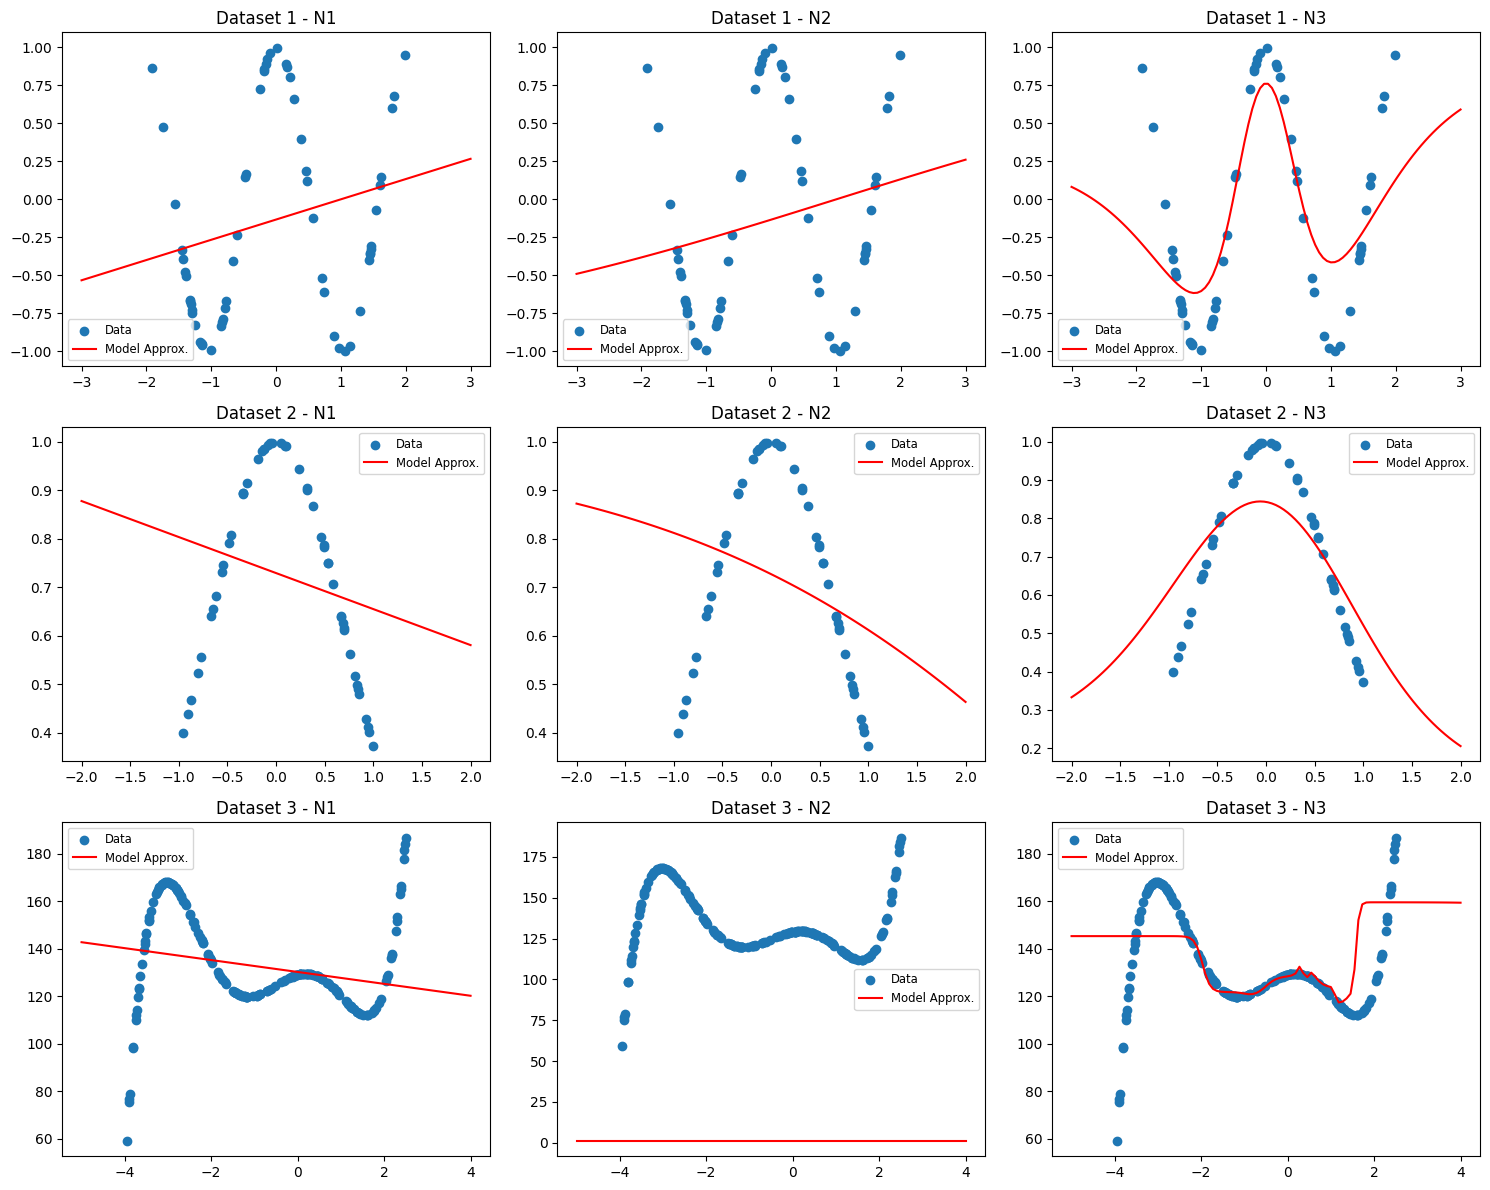

In [ ]:

from matplotlib import pyplot
import numpy as np

# Task 2.9: Plot Nine Functions in a Grid Layout (3 datasets × 3 models)
import numpy as np
import matplotlib.pyplot as plt

# 定义数据集、绘图范围和对应的神经元数
datasets = [X1, X2, X3]
ranges = [(-3, 3), (-2, 2), (-5, 4)]
Ks = [K1, K2, K3]  # 仅用于 N3 模型

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
model_types = ['N1', 'N2', 'N3']

for i, (dataset, R, K_val) in enumerate(zip(datasets, ranges, Ks)):
    # 准备数据
    X_arr = np.array([x for x, _ in dataset])
    t_arr = np.array([t for _, t in dataset])
    
    for j, model_type in enumerate(model_types):
        ax = axs[i, j]
        # 针对不同模型初始化参数并运行梯度下降
        if model_type == 'N3':
            theta_init = initialize_parameters('N3', K=K_val, input_dim=X_arr.shape[1])
            theta_opt = gradient_descent(X_arr, t_arr, theta_init, 'N3', lambda_reg, eta, epochs, K_val)
        else:
            theta_init = initialize_parameters(model_type, input_dim=X_arr.shape[1])
            theta_opt = gradient_descent(X_arr, t_arr, theta_init, model_type, lambda_reg, eta, epochs)
        
        # 生成绘图数据
        x_vals = np.linspace(R[0], R[1], 100)
        X_plot = np.column_stack((np.ones(len(x_vals)), x_vals))
        y_vals = forward_pass(X_plot, theta_opt, model_type, K_val if model_type=='N3' else None)
        
        # 绘制数据点和模型预测曲线
        ax.scatter([x[1] for x, _ in dataset], [t for _, t in dataset], label="Data")
        ax.plot(x_vals, y_vals, label="Model Approx.", color='red')
        ax.set_title(f"Dataset {i+1} - {model_type}")
        ax.legend(fontsize='small')

plt.tight_layout()
plt.show()
